In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

from scipy.cluster.hierarchy import dendrogram


In [2]:
df = pd.read_csv("../../haberman-clustering.csv")

In [3]:
df.head()

,Age,Op_year,axil_nodes
0,30,62,3
1,30,65,0
2,31,59,2
3,31,65,4
4,33,58,10


In [4]:
df.shape

(305, 3)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,305.0,52.531148,10.744024,30.0,44.0,52.0,61.0,83.0
Op_year,305.0,62.849180,3.254078,58.0,60.0,63.0,66.0,69.0
axil_nodes,305.0,4.036066,7.199370,0.0,0.0,1.0,4.0,52.0


In [6]:
scaler = StandardScaler()

In [7]:
scaled_df = scaler.fit_transform(df)

In [8]:
model = AgglomerativeClustering()

In [9]:
cluster_labels = model.fit_predict(scaled_df)

In [10]:
df['labels'] = cluster_labels

In [11]:
df.head()

,Age,Op_year,axil_nodes,labels
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [12]:
sil_scores = []
dav_scores = []
cal_scores = []
for i in range(2,10):   
    model = AgglomerativeClustering(n_clusters=i,linkage='single')
    cluster_labels = model.fit_predict(scaled_df)
    df['labels'] = cluster_labels
    sil_scores.append(silhouette_score(scaled_df,cluster_labels))
    dav_scores.append(davies_bouldin_score(scaled_df,cluster_labels))
    cal_scores.append(calinski_harabasz_score(scaled_df,cluster_labels))

    model = AgglomerativeClustering(n_clusters=i,linkage='complete')
    cluster_labels = model.fit_predict(scaled_df)
    df['labels'] = cluster_labels
    sil_scores.append(silhouette_score(scaled_df,cluster_labels))
    dav_scores.append(davies_bouldin_score(scaled_df,cluster_labels))
    cal_scores.append(calinski_harabasz_score(scaled_df,cluster_labels))


    model = AgglomerativeClustering(n_clusters=i,linkage='average')
    cluster_labels = model.fit_predict(scaled_df)
    df['labels'] = cluster_labels
    sil_scores.append(silhouette_score(scaled_df,cluster_labels))
    dav_scores.append(davies_bouldin_score(scaled_df,cluster_labels))
    cal_scores.append(calinski_harabasz_score(scaled_df,cluster_labels))


    model = AgglomerativeClustering(n_clusters=i,linkage='ward')
    cluster_labels = model.fit_predict(scaled_df)
    df['labels'] = cluster_labels
    sil_scores.append(silhouette_score(scaled_df,cluster_labels))
    dav_scores.append(davies_bouldin_score(scaled_df,cluster_labels))
    cal_scores.append(calinski_harabasz_score(scaled_df,cluster_labels))


In [13]:
print(F"Best Silhoutte Scores : {max(sil_scores)} ")
print(F"Best Davies Bouldin Scores : {max(dav_scores)} ")
print(F"Best Calinski Harabasz Scores : {max(cal_scores)} ")

Best Silhoutte Scores : 0.6775384579464386 
Best Davies Bouldin Scores : 1.6210524319672723 
Best Calinski Harabasz Scores : 127.51108864945019 


In [14]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

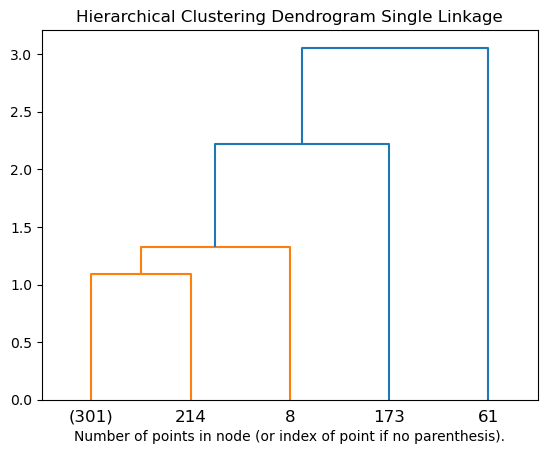

In [15]:
model = AgglomerativeClustering(linkage='single',compute_distances=True)
model.fit(scaled_df)

plt.title("Hierarchical Clustering Dendrogram Single Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

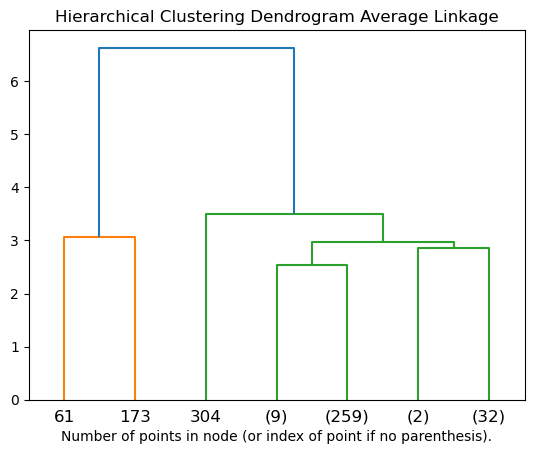

In [16]:
model = AgglomerativeClustering(linkage='average',compute_distances=True)
model.fit(scaled_df)

plt.title("Hierarchical Clustering Dendrogram Average Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

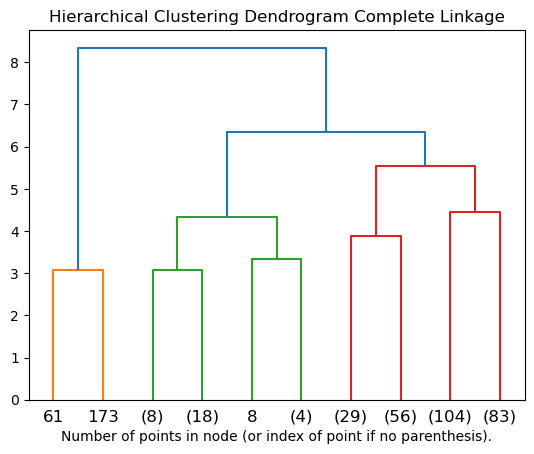

In [17]:
model = AgglomerativeClustering(linkage='complete',compute_distances=True)
model.fit(scaled_df)

plt.title("Hierarchical Clustering Dendrogram Complete Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

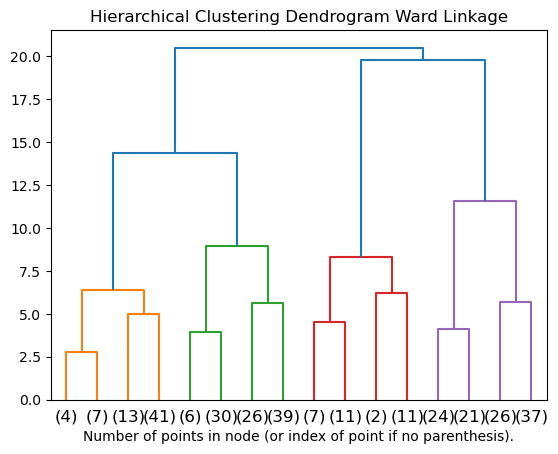

In [18]:
model = AgglomerativeClustering(linkage='ward',compute_distances=True)
model.fit(scaled_df)

plt.title("Hierarchical Clustering Dendrogram Ward Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()